import packages

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Provide data
Training data = 67.5% 3373
Test data = 32.5% 1500

In [111]:
from project_data_preparation import dg;

dg.describe()
# dg

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,3616.828032,14414.836856,3.898215,28.397086,5764.565976,6685.485327,62.114098,39.628360,0.299610
std,1518.849542,13946.848379,1.492559,16.419510,7958.981479,8612.775117,23.823088,25.101886,0.458134
min,1000.000000,750.000000,1.000000,6.000000,100.000000,100.000000,12.000000,0.000000,0.000000
25%,2300.000000,6000.000000,3.000000,16.000000,1380.000000,1800.000000,60.000000,23.000000,0.000000
50%,3604.000000,9750.000000,4.000000,24.000000,3220.000000,3800.000000,60.000000,40.000000,0.000000
75%,4933.000000,18000.000000,5.000000,38.000000,6800.000000,8100.000000,60.000000,51.000000,1.000000
max,6249.000000,99750.000000,8.000000,83.000000,88200.000000,90000.000000,192.000000,177.000000,1.000000


In [112]:
y = dg['target'].loc[:3372]
y = np.array(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
x = dg[["monthly_income","origination_score_band","TOB_months","closing_principal_balance","original_loan_amount","original_loan_term","remaining_loan_term"]].loc[:3372]
x



,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term
0,6000.0,5,83.0,300.0,1800.0,24,5
1,39000.0,5,82.0,7200.0,11700.0,60,42
2,18000.0,5,78.0,2700.0,5400.0,60,46
3,23250.0,3,76.0,3900.0,6900.0,60,48
4,12000.0,3,74.0,2100.0,3600.0,60,50
...,...,...,...,...,...,...,...
3368,6000.0,6,14.0,1500.0,1500.0,66,57
3369,6000.0,2,15.0,1500.0,1500.0,66,55
3370,750.0,5,15.0,250.0,250.0,39,29
3371,39750.0,4,11.0,10000.0,10000.0,63,56


In [114]:
x = np.array(x)
# x.shape
x


array([[6.000e+03, 5.000e+00, 8.300e+01, ..., 1.800e+03, 2.400e+01,
        5.000e+00],
       [3.900e+04, 5.000e+00, 8.200e+01, ..., 1.170e+04, 6.000e+01,
        4.200e+01],
       [1.800e+04, 5.000e+00, 7.800e+01, ..., 5.400e+03, 6.000e+01,
        4.600e+01],
       ...,
       [7.500e+02, 5.000e+00, 1.500e+01, ..., 2.500e+02, 3.900e+01,
        2.900e+01],
       [3.975e+04, 4.000e+00, 1.100e+01, ..., 1.000e+04, 6.300e+01,
        5.600e+01],
       [5.250e+03, 3.000e+00, 1.400e+01, ..., 1.250e+03, 6.000e+01,
        5.100e+01]])

Transform input data

In [137]:
x_ = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x)
x_

array([[6.00000000e+03, 5.00000000e+00, 8.30000000e+01, ...,
        2.25000000e+08, 4.68750000e+07, 9.76562500e+06],
       [3.90000000e+04, 5.00000000e+00, 8.20000000e+01, ...,
        3.48575472e+16, 2.44002830e+16, 1.70801981e+16],
       [1.80000000e+04, 5.00000000e+00, 7.80000000e+01, ...,
        7.21714040e+16, 5.53314098e+16, 4.24207475e+16],
       ...,
       [7.50000000e+02, 5.00000000e+00, 1.50000000e+01, ...,
        7.60874794e+14, 5.65778693e+14, 4.20707233e+14],
       [3.97500000e+04, 4.00000000e+00, 1.10000000e+01, ...,
        3.83871010e+17, 3.41218675e+17, 3.03305489e+17],
       [5.25000000e+03, 3.00000000e+00, 1.40000000e+01, ...,
        1.64764600e+17, 1.40049910e+17, 1.19042424e+17]])

Create model and fit it

In [138]:
model = LinearRegression().fit(x_, y)

Get results

In [136]:
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")


coefficient of determination: 0.21925544606903902
intercept: 0.31654083731265287
coefficients: [-4.07109179e-17  1.61985096e-16  1.00830092e-16 ...  1.16914214e-19
  1.38475755e-19  1.60530211e-19]


In [166]:
y_pred = model.predict(x_)
print(abs(y_pred))
print(y)

y_compare = pd.DataFrame({"y":list(y),"y_pred":list(abs(y_pred))}, index = range(0,len(y)))
y_compare["count"]=range(0,len(y))
y_compare



[0.29964976 0.20313089 0.17594562 ... 0.29953339 0.80745248 0.29953754]
[0 0 0 ... 0 0 0]


,y,y_pred,count
0,0,0.299650,0
1,0,0.203131,1
2,0,0.175946,2
3,1,1.172509,3
4,0,0.300228,4
...,...,...,...
3368,1,0.299545,3368
3369,0,0.299540,3369
3370,0,0.299533,3370
3371,0,0.807452,3371


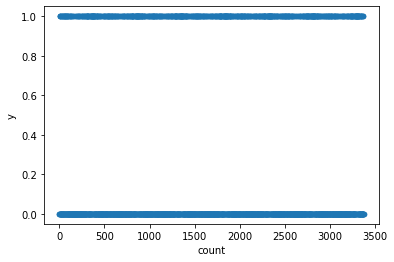

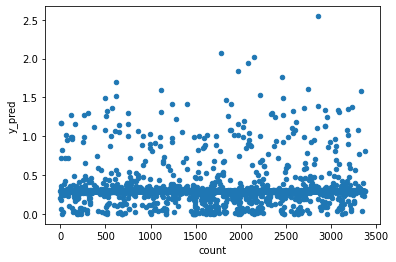

In [167]:
y_compare.plot(kind = "scatter", x="count",y="y")
y_compare.plot(kind = "scatter", x="count",y="y_pred")
plt.show()

# Advanced linear Regression with statsmodels

In [139]:
import numpy as np
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(x)

In [207]:
y = dg['target'].loc[:3372]
y = np.array(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
x = dg[["monthly_income","origination_score_band","TOB_months","closing_principal_balance","original_loan_amount","original_loan_term","remaining_loan_term"]].loc[:3372]
x



,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term
0,6000.0,5,83.0,300.0,1800.0,24,5
1,39000.0,5,82.0,7200.0,11700.0,60,42
2,18000.0,5,78.0,2700.0,5400.0,60,46
3,23250.0,3,76.0,3900.0,6900.0,60,48
4,12000.0,3,74.0,2100.0,3600.0,60,50
...,...,...,...,...,...,...,...
3368,6000.0,6,14.0,1500.0,1500.0,66,57
3369,6000.0,2,15.0,1500.0,1500.0,66,55
3370,750.0,5,15.0,250.0,250.0,39,29
3371,39750.0,4,11.0,10000.0,10000.0,63,56


In [208]:
x = np.array(x)
# x.shape
x


array([[6.000e+03, 5.000e+00, 8.300e+01, ..., 1.800e+03, 2.400e+01,
        5.000e+00],
       [3.900e+04, 5.000e+00, 8.200e+01, ..., 1.170e+04, 6.000e+01,
        4.200e+01],
       [1.800e+04, 5.000e+00, 7.800e+01, ..., 5.400e+03, 6.000e+01,
        4.600e+01],
       ...,
       [7.500e+02, 5.000e+00, 1.500e+01, ..., 2.500e+02, 3.900e+01,
        2.900e+01],
       [3.975e+04, 4.000e+00, 1.100e+01, ..., 1.000e+04, 6.300e+01,
        5.600e+01],
       [5.250e+03, 3.000e+00, 1.400e+01, ..., 1.250e+03, 6.000e+01,
        5.100e+01]])

In [209]:
x = sm.add_constant(x)
x

array([[1.000e+00, 6.000e+03, 5.000e+00, ..., 1.800e+03, 2.400e+01,
        5.000e+00],
       [1.000e+00, 3.900e+04, 5.000e+00, ..., 1.170e+04, 6.000e+01,
        4.200e+01],
       [1.000e+00, 1.800e+04, 5.000e+00, ..., 5.400e+03, 6.000e+01,
        4.600e+01],
       ...,
       [1.000e+00, 7.500e+02, 5.000e+00, ..., 2.500e+02, 3.900e+01,
        2.900e+01],
       [1.000e+00, 3.975e+04, 4.000e+00, ..., 1.000e+04, 6.300e+01,
        5.600e+01],
       [1.000e+00, 5.250e+03, 3.000e+00, ..., 1.250e+03, 6.000e+01,
        5.100e+01]])

In [210]:
model = sm.OLS(y, x)

In [211]:
results = model.fit()

In [212]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     11.50
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.66e-14
Time:                        20:35:21   Log-Likelihood:                -2111.4
No. Observations:                3373   AIC:                             4239.
Df Residuals:                    3365   BIC:                             4288.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1273      0.034      3.768      0.0